In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
FIGPATH = "../figs/"
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *
from logreg import *
from utils import plot_settings
plot_settings()

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
print(X.shape)

X shape =  (70000, 784)
y shape =  (70000,)
(70000, 784)


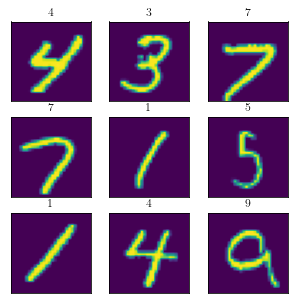

In [3]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])

In [4]:
X = np.c_[np.ones(y.shape[0]), X] # Adding an intercept term. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 785)
(56000,)


In [5]:
# Preprocess Y
y_train_onehot = np.zeros([len(y_train), 10])
y_test_onehot = np.zeros([len(y_test), 10])

for i, num in enumerate(y_train):
    y_train_onehot[i, int(num)] = 1
    
for i, num in enumerate(y_test):
    y_test_onehot[i, int(num)] = 1

In [6]:
y_test_onehot.shape

(14000, 10)

In [7]:
# Logreg without momentum

learning_rate = np.logspace(-3, 0, 4)
tot_epochs = 100
epochs_per_itter = 1
num_itter = int(tot_epochs / epochs_per_itter)
momentum = 0

N = X_train.shape[0]
MB_num = [int(N / 32), int(N / 128)]
logreg_score = np.zeros([len(MB_num), len(learning_rate), num_itter])

np.random.seed(2020)

# Initialize the logreg using the same weights across all attempts
init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1])
for k in range(len(MB_num)):
    for i in range(len(learning_rate)):    
        reg_w = logreg(
            x = X_train, 
            y = y_train_onehot, 
            M = MB_num[k],
            init_w = init_w, 
            n_epochs = epochs_per_itter, 
            learning_rate = learning_rate[i], 
            momentum = momentum,)
        
        y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
        y_test_model = np.argmax(y_predict,axis=1)
        y_test_data = np.argmax(y_test_onehot,axis=1)
        score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

        logreg_score[k, i, 0] = score

        for j in range(1, num_itter):
            reg_w = logreg(
                x = X_train, 
                y = y_train_onehot, 
                M = MB_num[k],
                init_w = reg_w, 
                n_epochs = epochs_per_itter, 
                learning_rate = learning_rate[i], 
                momentum = momentum,)
            
            y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
            y_test_model = np.argmax(y_predict,axis=1)
            y_test_data = np.argmax(y_test_onehot,axis=1)
            score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

            logreg_score[k, i, j] = score

In [8]:
#logreg with momentum

learning_rate = np.logspace(-3, 0, 4)
tot_epochs = 100
epochs_per_itter = 1
num_itter = int(tot_epochs / epochs_per_itter)
momentum = 0.75

N = X_train.shape[0]
MB_num = [int(N / 32), int(N / 128)]
logreg_score_momentum = np.zeros([len(MB_num), len(learning_rate), num_itter])

np.random.seed(2020)

# Initialize the logreg using the same weights across all attempts
init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1])
for k in range(len(MB_num)):
    for i in range(len(learning_rate)):    
        reg_w = logreg(
            x = X_train, 
            y = y_train_onehot, 
            M = MB_num[k],
            init_w = init_w, 
            n_epochs = epochs_per_itter, 
            learning_rate = learning_rate[i], 
            momentum = momentum,)
        
        y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
        y_test_model = np.argmax(y_predict,axis=1)
        y_test_data = np.argmax(y_test_onehot,axis=1)
        score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

        logreg_score_momentum[k, i, 0] = score

        for j in range(1, num_itter):
            reg_w = logreg(
                x = X_train, 
                y = y_train_onehot, 
                M = MB_num[k],
                init_w = reg_w, 
                n_epochs = epochs_per_itter, 
                learning_rate = learning_rate[i], 
                momentum = momentum,)
            
            y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
            y_test_model = np.argmax(y_predict,axis=1)
            y_test_data = np.argmax(y_test_onehot,axis=1)
            score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

            logreg_score_momentum[k, i, j] = score

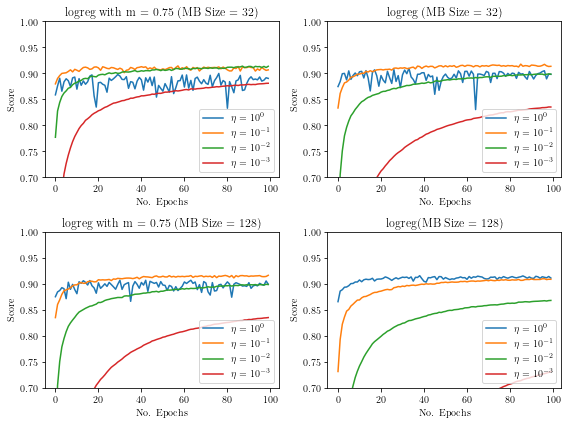

In [9]:
FIGSIZE = (4, 3)
YLIMS = [0.7, 1]

plt.figure(figsize=FIGSIZE * np.array([2, 2]))
plt.subplot(221)
for i in range(len(learning_rate)-1, -1, -1):
    plt.plot(logreg_score_momentum[0, i, :], label="$\eta = 10^{%i}$" % int(np.log10(learning_rate[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
plt.legend(loc="lower right")
plt.title(f"logreg with m = {momentum} (MB Size = {32})")

plt.subplot(222)
for i in range(len(learning_rate)-1, -1, -1):
    plt.plot(logreg_score[0, i, :], label="$\eta = 10^{%i}$" % int(np.log10(learning_rate[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
plt.legend(loc="lower right")
plt.title(f"logreg (MB Size = {32})")


plt.subplot(223)
for i in range(len(learning_rate)-1, -1, -1):
    plt.plot(logreg_score_momentum[1, i, :], label="$\eta = 10^{%i}$" % int(np.log10(learning_rate[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
plt.legend(loc="lower right")
plt.title(f"logreg with m = {momentum} (MB Size = {128})")

plt.subplot(224)
for i in range(len(learning_rate)-1, -1, -1):
    plt.plot(logreg_score[1, i, :], label="$\eta = 10^{%i}$" % int(np.log10(learning_rate[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
fig_leg = plt.legend(loc="lower right")
plt.title(f"logreg(MB Size = {128})")


plt.tight_layout()

plt.savefig(FIGPATH+"logreg_learning_rate.pdf")

In [10]:
#logreg with regularization and momentum

learning_rate = np.logspace(-3, -1, 3)
penalties = np.logspace(-4, -1, 4)
tot_epochs = 100
epochs_per_itter = 1
num_itter = int(tot_epochs / epochs_per_itter)
momentum = 0.0 # Turn momentum to 0 to observe the regularization absolutely killing the learning.
               # Use momentum = 0.75 to get stable results close to optimal. Still semms to kill the learning, but
               # Not much learning left to do anyway.
N = X_train.shape[0]
MB_num = int(N / 32)
logreg_score_penalties = np.zeros([len(penalties), len(learning_rate), num_itter])

np.random.seed(2020)

# Initialize the logreg using the same weights across all attempts
init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1])
for k in range(len(penalties)):
    for i in range(len(learning_rate)):    
        reg_w = logreg(
            x = X_train, 
            y = y_train_onehot, 
            M = MB_num,
            init_w = init_w, 
            n_epochs = epochs_per_itter, 
            learning_rate = learning_rate[i], 
            momentum = momentum,
            lambd = penalties[k])
        
        y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
        y_test_model = np.argmax(y_predict,axis=1)
        y_test_data = np.argmax(y_test_onehot,axis=1)
        score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

        logreg_score_penalties[k, i, 0] = score

        for j in range(1, num_itter):
            reg_w = logreg(
            x = X_train, 
            y = y_train_onehot, 
            M = MB_num,
            init_w = init_w, 
            n_epochs = epochs_per_itter, 
            learning_rate = learning_rate[i], 
            momentum = momentum,
            lambd = penalties[k])
            
            y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
            y_test_model = np.argmax(y_predict,axis=1)
            y_test_data = np.argmax(y_test_onehot,axis=1)
            score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

            logreg_score_penalties[k, i, j] = score

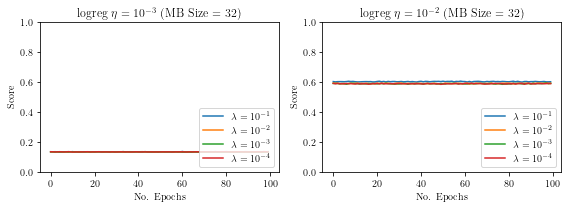

In [11]:
FIGSIZE = (8, 3)
YLIMS = [0.0, 1]


plt.figure(figsize=FIGSIZE)
plt.subplot(121)
j = 0
for i in range(len(penalties)-1, -1, -1):
    plt.plot(logreg_score_penalties[i, j, :], label="$\lambda = 10^{%i}$" % int(np.log10(penalties[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
plt.legend(loc="lower right")
plt.title("logreg $\eta = 10^{%i}$  (MB Size = 32)" % int(np.log10(learning_rate[j])))

plt.subplot(122)
j = 1
for i in range(len(penalties)-1, -1, -1):
    plt.plot(logreg_score_penalties[i, j, :], label="$\lambda = 10^{%i}$" % int(np.log10(penalties[i])))
plt.xlabel("No. Epochs")
plt.ylabel("Score")
plt.ylim(YLIMS)
plt.legend(loc="lower right")
plt.title("logreg $\eta = 10^{%i}$  (MB Size = 32)" % int(np.log10(learning_rate[j])))

# plt.subplot(133)
# j = 2
# for i in range(len(penalties)-1, -1, -1):
#     plt.plot(logreg_score_penalties[i, j, :], label="$\lambda = 10^{%i}$" % int(np.log10(penalties[i])))
# plt.xlabel("No. Epochs")
# plt.ylabel("Score")
# plt.ylim(YLIMS)
# plt.legend(loc="lower right")
# plt.title("logreg $\eta = 10^{%i}$  (MB Size = 32)" % int(np.log10(learning_rate[j])))

plt.tight_layout()
plt.savefig(FIGPATH+"logreg_regularization.pdf")

In [12]:
#Skeleton for logreg use:
np.random.seed(2020)

# Get data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
X = np.c_[np.ones(y.shape[0]), X] # adding an intercept column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Preprocess Y for logreg
y_train_onehot = np.zeros([len(y_train), 10])
y_test_onehot = np.zeros([len(y_test), 10])

for i, num in enumerate(y_train):
    y_train_onehot[i, int(num)] = 1
    
for i, num in enumerate(y_test):
    y_test_onehot[i, int(num)] = 1


In [13]:
# Do the logreg

n_epochs = 100
M_number = int(len(y_train_onehot)/32)

np.random.seed(2020)
init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1]) * np.sqrt(2/(785*10)) #scaling by
                                                                    #sqrt(2/number_weights) gives 
                                                                    #slightly better performance
reg_w = logreg(
    x = X_train, 
    y = y_train_onehot, 
    M = M_number, 
    init_w = init_w, 
    n_epochs = n_epochs, 
    learning_rate = 0.01, 
    momentum = 0.75, 
    lambd=None) # Set lambd if l2-regularization is wanted

# How does it score?
y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
y_test_model = np.argmax(y_predict,axis=1)
y_test_data = np.argmax(y_test_onehot,axis=1)
score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)
print('for 100 epochs and no lambda, score:{}'.format(score))


# # Do it again with lambda:
np.random.seed(2020)
init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1]) * np.sqrt(2/(785*10))
reg_w = logreg(
    x = X_train, 
    y = y_train_onehot, 
    M = M_number, 
    init_w = init_w, 
    n_epochs = n_epochs, 
    learning_rate = 0.01, 
    momentum = 0.75, 
    lambd=1e-4) # Set lambd if l2-regularization is wanted

# How does it score?
y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)
y_test_model = np.argmax(y_predict,axis=1)
y_test_data = np.argmax(y_test_onehot,axis=1)
score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)

print('for 100 epochs and 1e-4 lambda, score:{}'.format(score))

for 100 epochs and no lambda, score:0.9170714285714285
for 100 epochs and 1e-4 lambda, score:0.9172857142857143


In [14]:
SKL_logreg = LogisticRegression(penalty ='none')
SKL_logreg.fit(X_train,y_train)
print('Scikit no lambda logistic regression score:{}'.format(SKL_logreg.score(X_test,y_test)))

Scikit no lambda logistic regression score:0.9159285714285714


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
SKL_logreg = LogisticRegression(penalty ='l2' )
SKL_logreg.fit(X_train,y_train)
print('Scikit default logistic regression score:{}'.format(SKL_logreg.score(X_test,y_test)))

Scikit default logistic regression score:0.9165


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
SKL_logreg = LogisticRegression(penalty ='none', solver = 'saga')
SKL_logreg.fit(X_train,y_train)
print('Scikit no lambda, saga solver logistic regression score:{}'.format(SKL_logreg.score(X_test,y_test)))


SKL_logreg = LogisticRegression(penalty ='l2', solver = 'saga' )
SKL_logreg.fit(X_train,y_train)
print('Scikit l2 lambda, saga solver, logistic regression score:{}'.format(SKL_logreg.score(X_test,y_test)))

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Scikit no lambda, saga solver logistic regression score:0.9149285714285714
Scikit l2 lambda, saga solver, logistic regression score:0.9160714285714285


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [17]:
### Conclusions: Regularizaton does not seem to give particularly improved results, it's not even clear that there is
### any noteworthy effect when using momentum. In the absence of momentum, regularization seems to pretty
### heavily dampen any learning, leaving the score more or less constant over the whole set of epochs.
### Both our logistic regression and the default SKLearn methods give accuracy score around
### 0.89-0.92, which is significantly worse than we get from fairly simple tuning of our neural networks.
### Using the scaling of the initial weights *sqrt(2/number_weights) is what gets us on the level of SKLearn.
### Without that scaling we are usually 0.01-0.02 below them in score. The results are not necessarily converged,
### but further improvements are pretty small for relatively long computations.